### Imports

In [43]:
import mne
import os
import scipy
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import spectrogram, hann

from utils import find_folders
import dat_preproc


### Load BrainSense Survey Files

In [9]:
#reload(find_folders)
onedrive = find_folders.get_onedrive_path()
ftg_path = find_folders.get_onedrive_path("FTG")
print(ftg_path)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\FTG_PROJECT


In [58]:
raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'raw_mats',
        "sub029",
        "sub-029_ses-EphysMedOn01_task-Rest_acq-StimOffRSegInter_run-02_ieeg.mat"
    ),
    info = None
)

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.


C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8856\2612751965.py:1: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8856\2612751965.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'LFP_Stn_R_1_A1_A', 'LFP_Stn_R_2_A2_A'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8856\2612751965.py:1: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8856\2612751965.py:1: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_1_A1_A

### Filtering

In [59]:
pass_filtered_dat = dat_preproc.low_highpass_filter(raw.get_data(), 5, 100)

### Plot Spectrograms

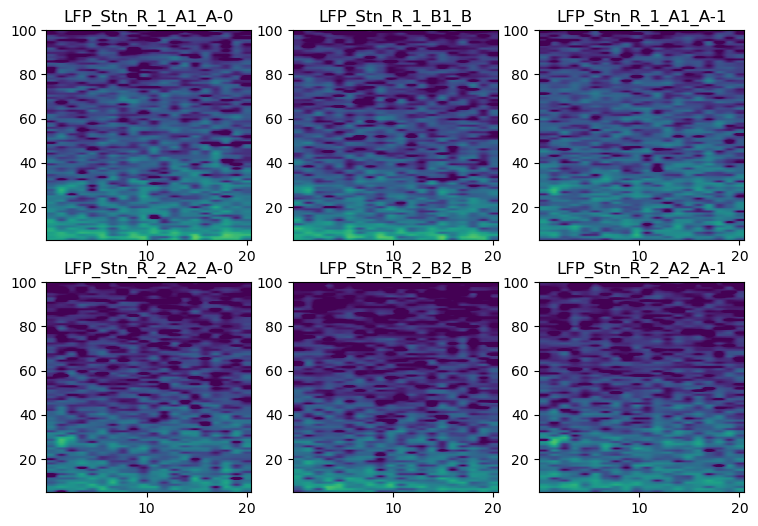

In [62]:
#reload(dat_preproc)
win_samp = 250
noverlap = 0.5
window = hann(win_samp, sym=False)
x = pass_filtered_dat
f, t, Sxx = scipy.signal.spectrogram(x = x, fs = 250, window = window, noverlap = noverlap)

%matplotlib inline
fig = plt.figure(figsize=(9, 6))

if x.shape[0] == 3:
    n_rows = 1
elif x.shape[0] == 6:
    n_rows = 2

for k in range(0,x.shape[0]):
    plt.subplot(n_rows,3,k+1)
    plt.specgram(x = x[k,:], Fs = 250, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax =20)
    plt.ylim(5,100)
    plt.title(raw.ch_names[k])

### Plot Power Spectra

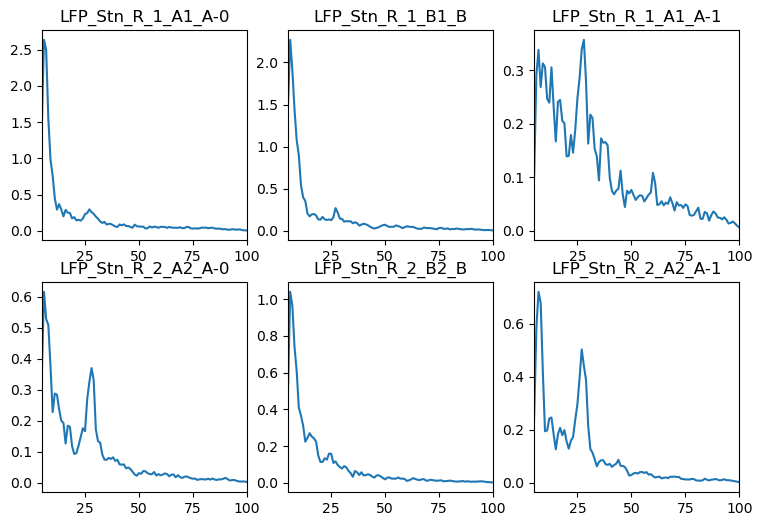

In [63]:
%matplotlib inline
fig = plt.figure(figsize=(9, 6))

if x.shape[0] == 3:
    n_rows = 1
elif x.shape[0] == 6:
    n_rows = 2

for k in range(0,x.shape[0]):
    
    plt.subplot(n_rows,3,k+1)

    plt.plot(np.mean(Sxx[k],1))
    plt.xlim(5, 100)
    plt.title(raw.ch_names[k])